In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
from collections import Counter

In [2]:
#Data reading
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

**Прочитаем памятку с описанием признаков**

In [3]:
!cat "../input/data_description.txt"

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Удалим ID, тк никакой информации он не несет (равен индексу)

In [5]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

Просмотрим типы признаков

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Выведем описание количественных признаков

In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Займемся очисткой данных**

Для начала посмотрим, сколько пропусков содержится по каждому признаку

В train 

In [8]:
nan_col_sum_train = train.isnull().sum()
nan_col_sum_train = nan_col_sum_train[nan_col_sum_train>0].sort_values(ascending=False)
nan_col_sum_train.index.values

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

В test

In [9]:
nan_col_sum_test = test.isnull().sum()
nan_col_sum_test = nan_col_sum_test[nan_col_sum_test>0].sort_values(ascending=False)
nan_col_sum_test.index.values

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageQual',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType',
       'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st',
       'SaleType', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype=object)

Пропуски в признаках в train и test

In [10]:
tmp = nan_col_sum_train.append(nan_col_sum_test)
tmp = np.array(list(set(tmp.index.values)))

In [11]:
tmp

array(['BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'Electrical',
       'BsmtFinType1', 'FireplaceQu', 'Utilities', 'SaleType',
       'TotalBsmtSF', 'MSZoning', 'BsmtCond', 'BsmtQual', 'Exterior2nd',
       'BsmtFinType2', 'BsmtFinSF2', 'Exterior1st', 'BsmtFinSF1',
       'GarageCond', 'BsmtFullBath', 'LotFrontage', 'GarageQual',
       'GarageCars', 'BsmtExposure', 'MasVnrType', 'Alley', 'GarageYrBlt',
       'Fence', 'KitchenQual', 'Functional', 'MiscFeature', 'GarageType',
       'PoolQC', 'MasVnrArea', 'GarageFinish'], dtype='<U12')

Получим индексы столбцов, в которых нужно заменить пропуски на наиболее часто встречающееся значение

In [12]:
ind_to_mode =[np.where(tmp ==x)[0][0] for x in ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]]

In [13]:
for indx in tmp[ind_to_mode]:
    train[indx] = train[indx].fillna(train[indx].mode()[0])
    test[indx] = test[indx].fillna(test[indx].mode()[0])

Получим индексы столбцов, в которых нужно заменить пропуски на None

In [14]:
ind_to_none = [np.where(tmp==x)[0][0] for x in ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]]

In [15]:
for indx in tmp[ind_to_none]:
    train[indx] = train[indx].fillna("None")
    test[indx] = test[indx].fillna("None")

Получим индексы столбцов, в которых нужно заменить пропуски на 0

In [16]:
ind_to_zero = [np.where(tmp==x)[0][0] for x in ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]]

In [17]:
for indx in tmp[ind_to_zero]:
    train[indx] = train[indx].fillna(0)
    test[indx] = test[indx].fillna(0)

Заполненные столбцы

In [18]:
ind_use = np.sort([ind_to_zero+ind_to_none+ind_to_mode])

Найдем незаполненные столбцы

In [19]:
other_fill = tmp[[indx for indx in range(len(tmp)) if indx not in ind_use][0]]

In [20]:
train[other_fill] = train.groupby('Neighborhood')[other_fill].transform(lambda x: x.fillna(x.median()))
test[other_fill] = test.groupby('Neighborhood')[other_fill].transform(lambda x: x.fillna(x.median()))

Гистограммы для каждого признака

In [21]:
[print(i, Counter(train[i])) for i in train.columns.values[:-1] if train[i].dtype == np.object]

MSZoning Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
Street Counter({'Pave': 1454, 'Grvl': 6})
Alley Counter({'None': 1369, 'Grvl': 50, 'Pave': 41})
LotShape Counter({'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10})
LandContour Counter({'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36})
Utilities Counter({'AllPub': 1459, 'NoSeWa': 1})
LotConfig Counter({'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4})
LandSlope Counter({'Gtl': 1382, 'Mod': 65, 'Sev': 13})
Neighborhood Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2})
Condition1 Counter({'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRN

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


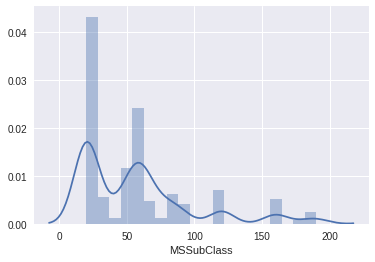

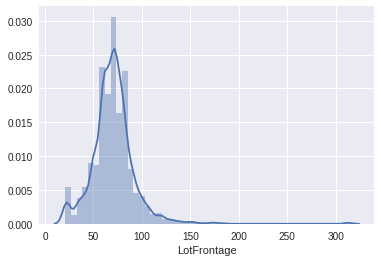

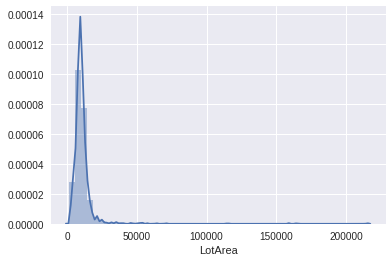

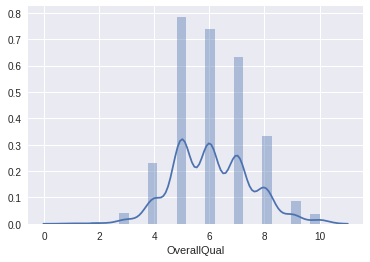

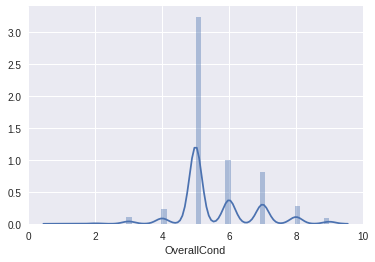

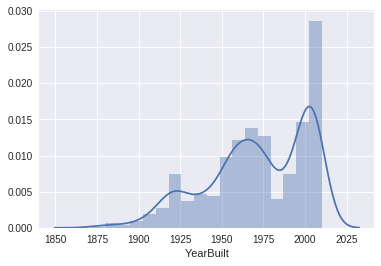

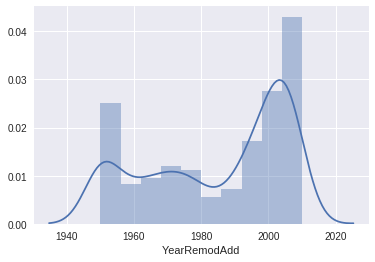

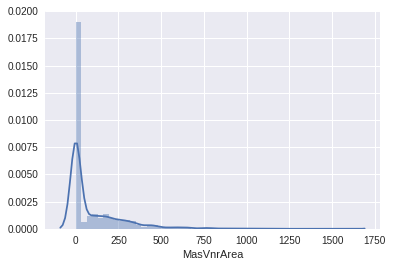

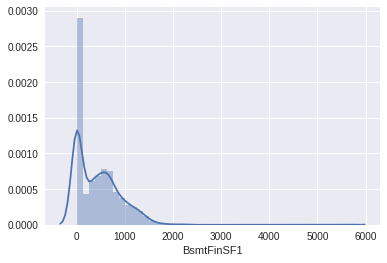

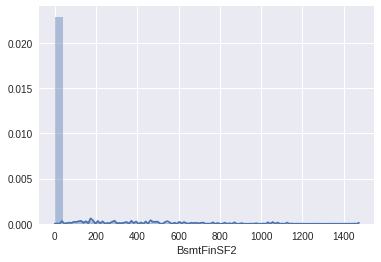

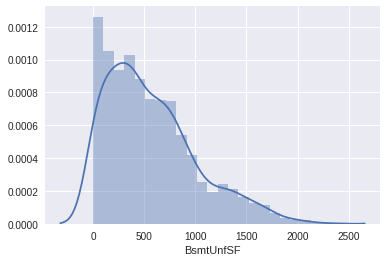

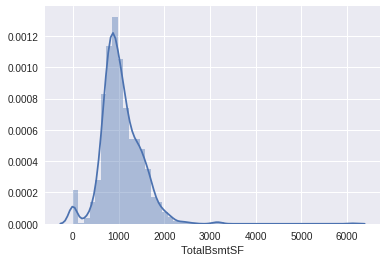

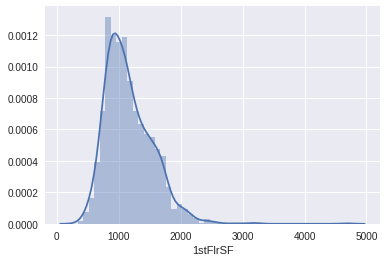

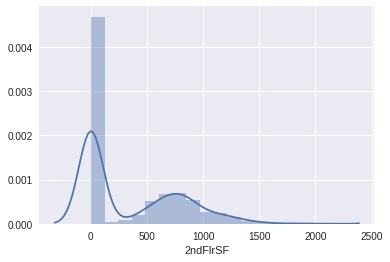

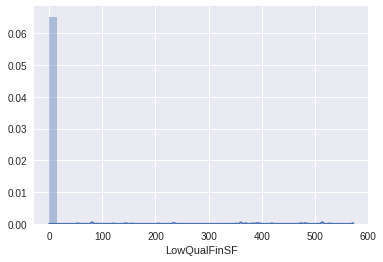

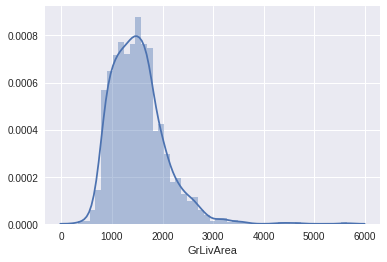

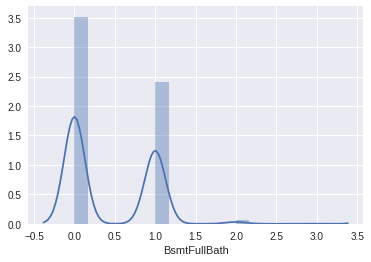

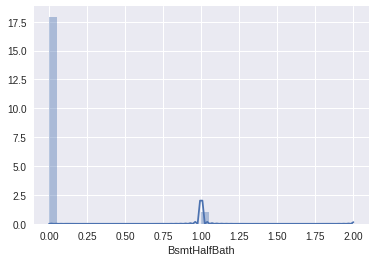

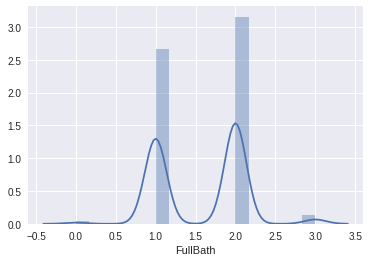

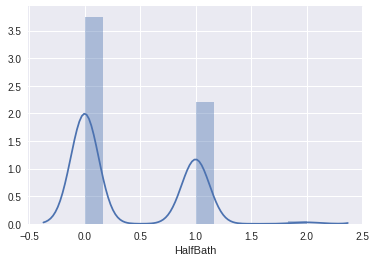

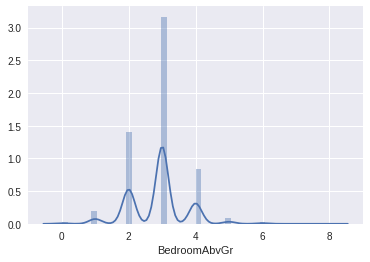

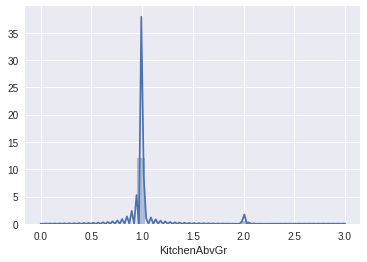

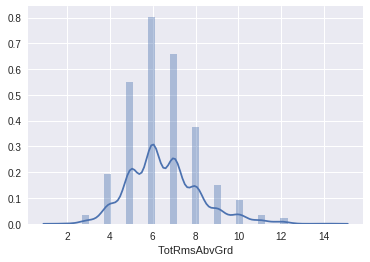

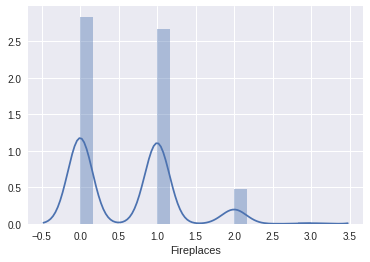

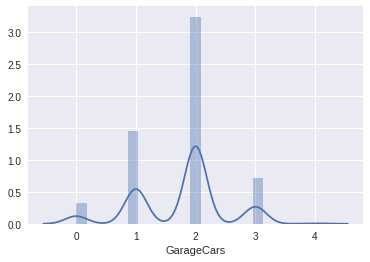

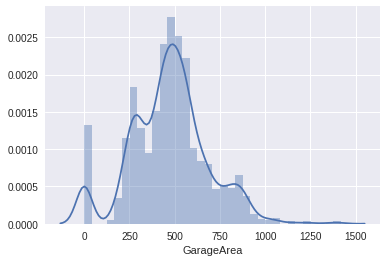

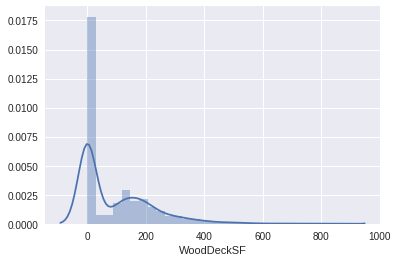

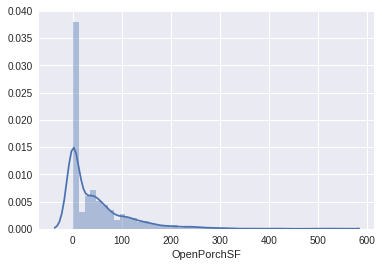

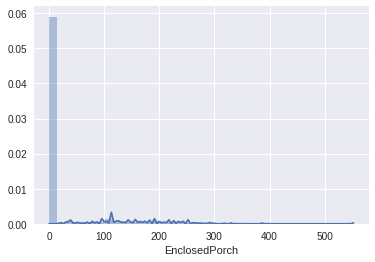

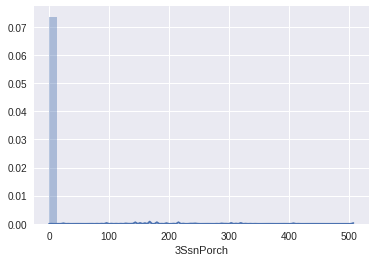

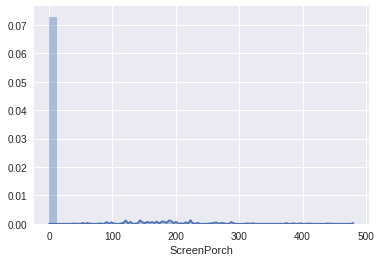

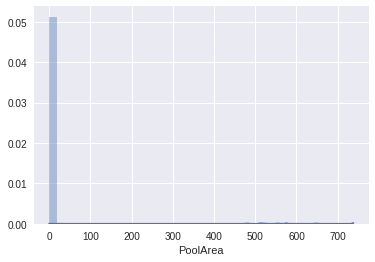

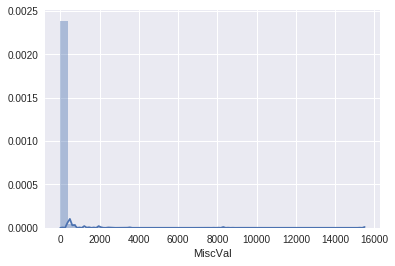

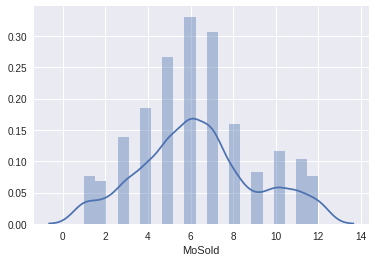

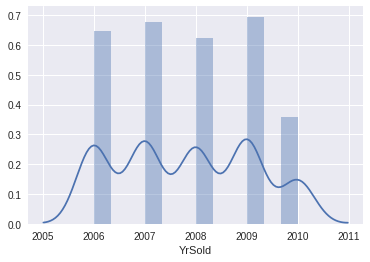

In [22]:
for i in train.columns.values[:-1]:
    if(train[i].dtype == np.float64 or train[i].dtype == np.int64):
        sns.distplot(train[i])
        plt.show()


In [23]:
train['SalePrice'] = np.log(train.SalePrice)

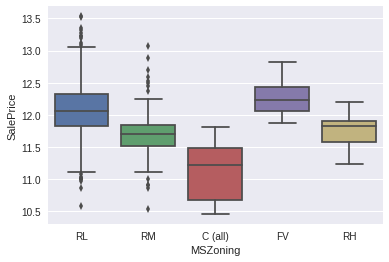

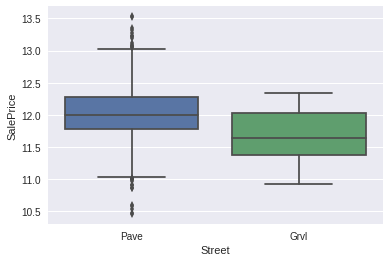

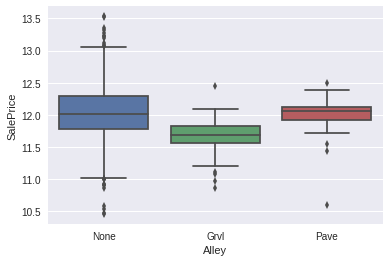

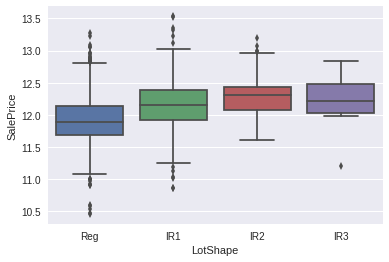

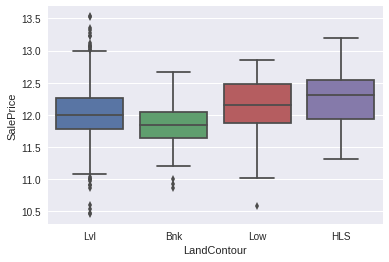

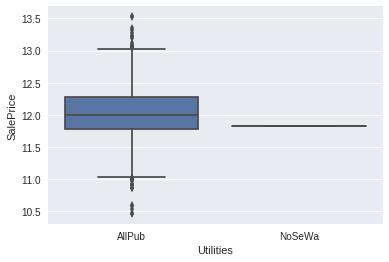

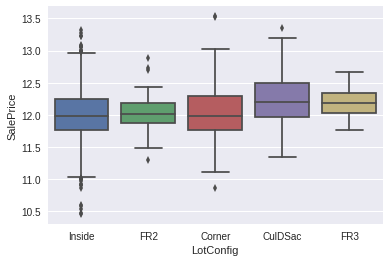

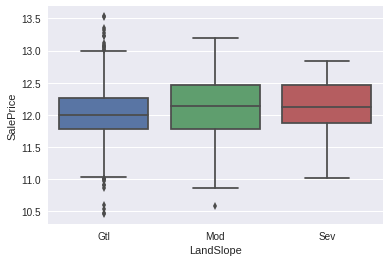

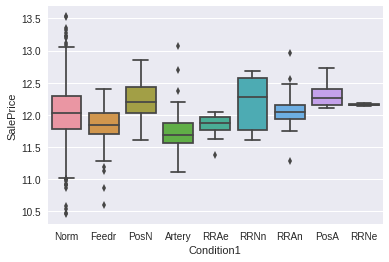

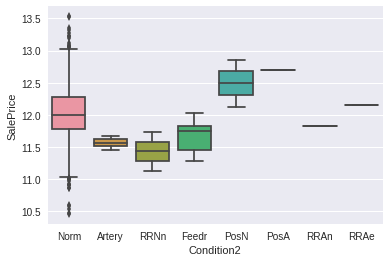

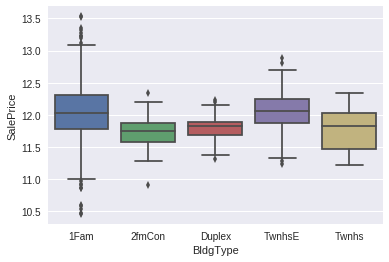

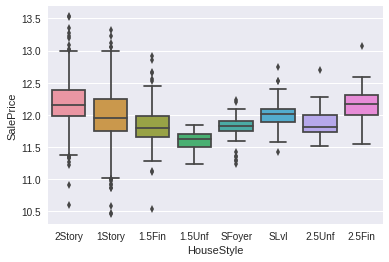

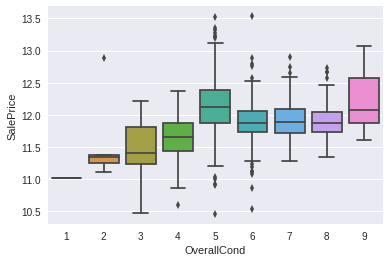

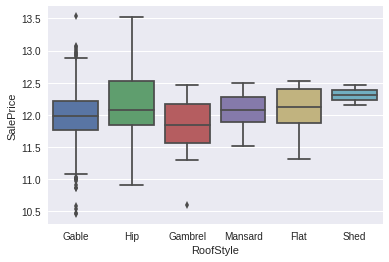

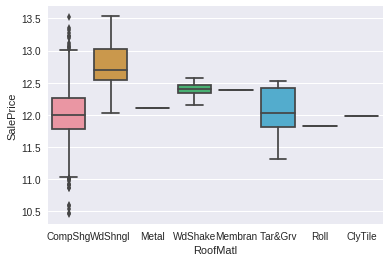

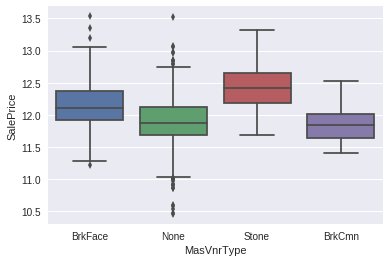

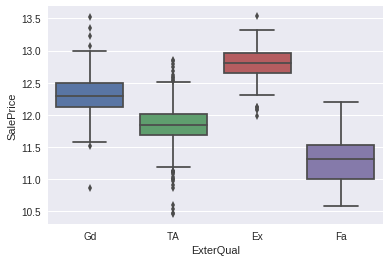

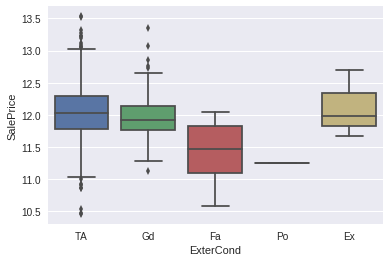

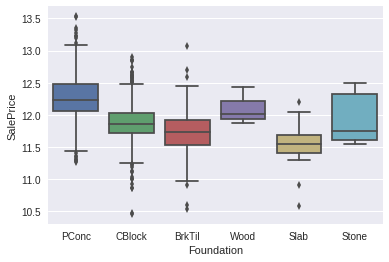

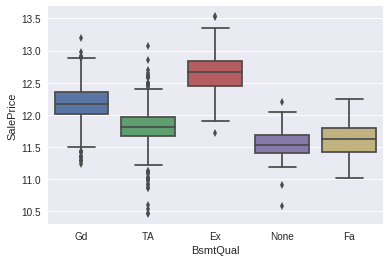

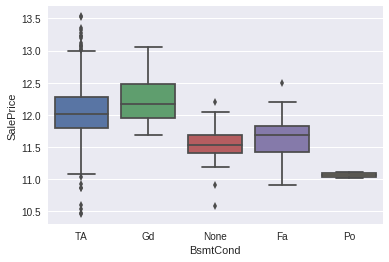

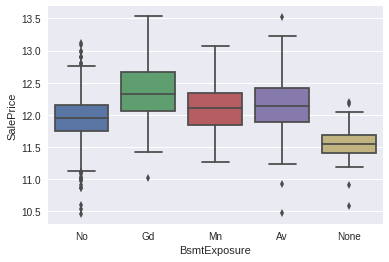

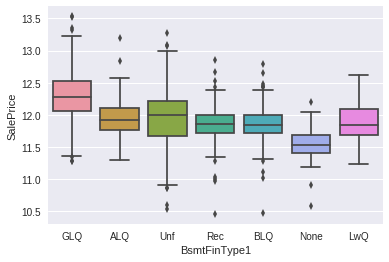

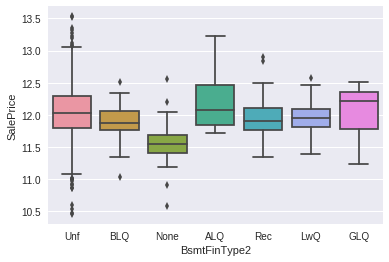

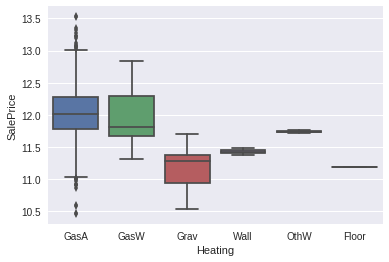

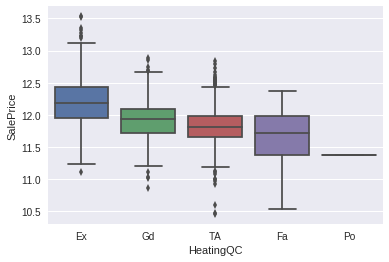

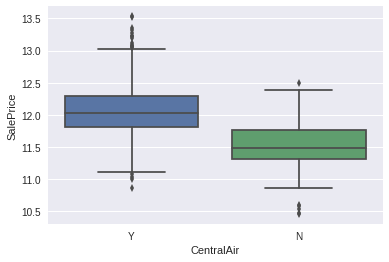

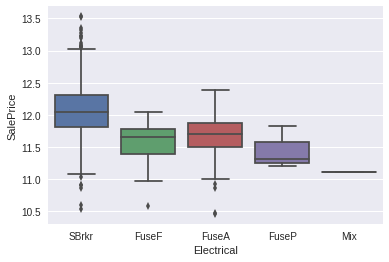

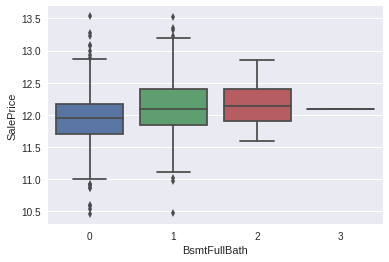

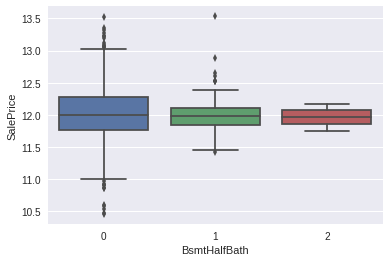

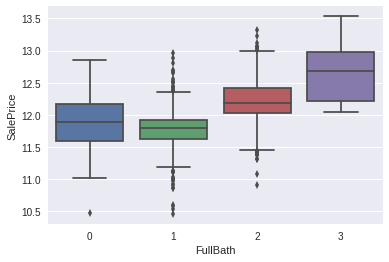

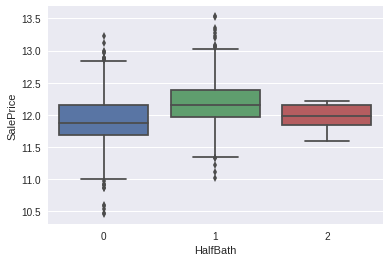

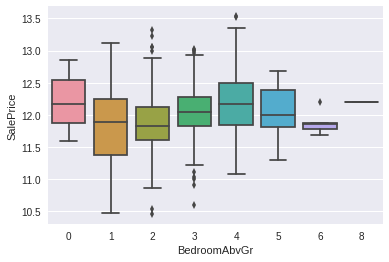

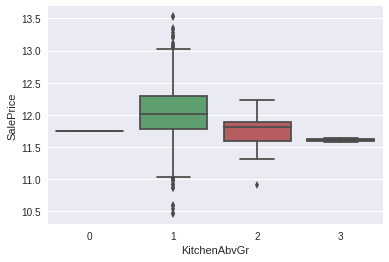

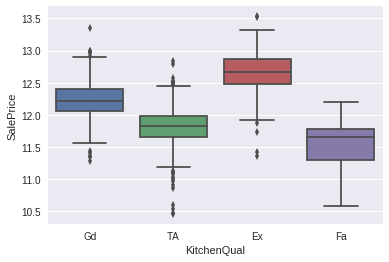

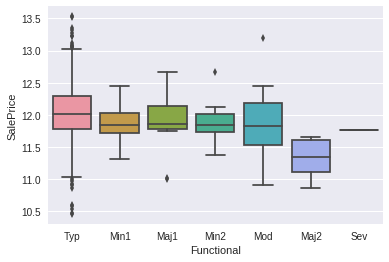

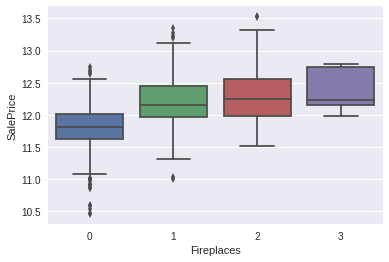

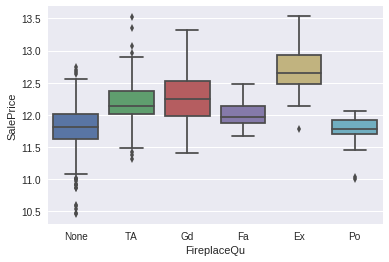

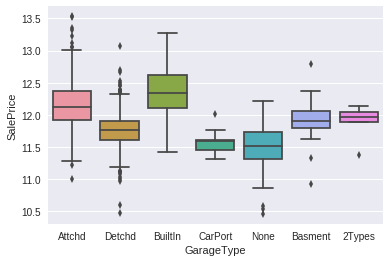

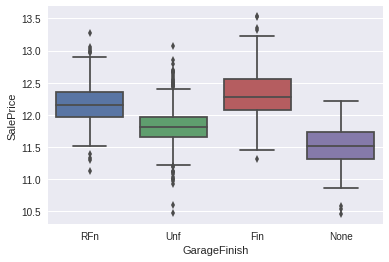

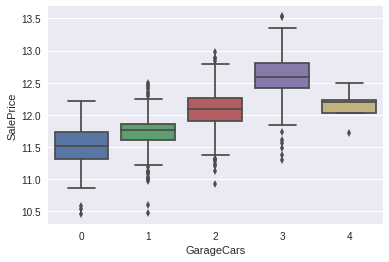

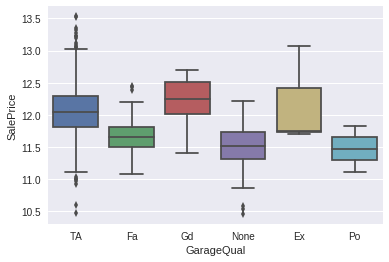

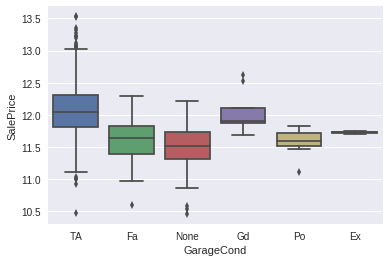

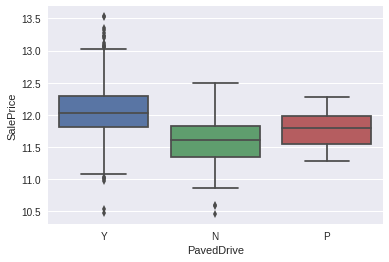

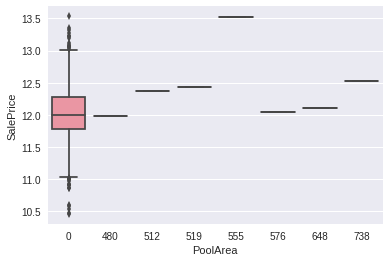

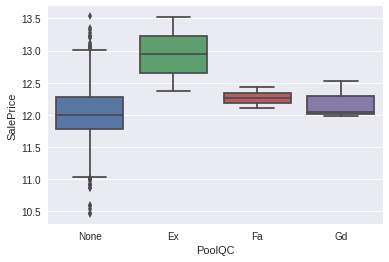

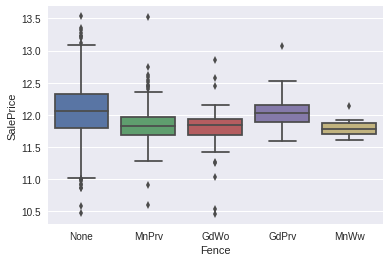

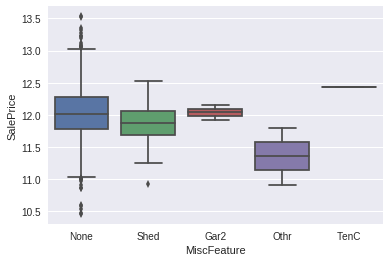

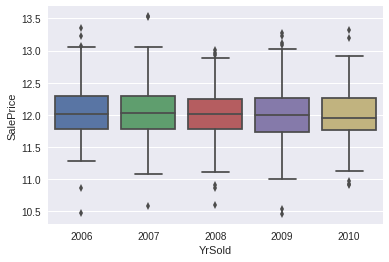

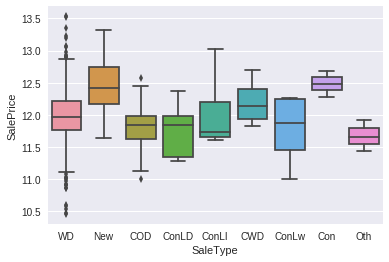

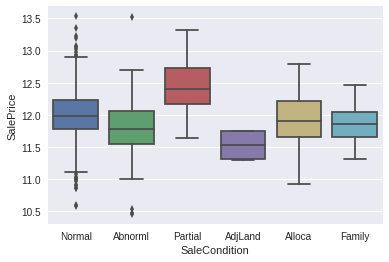

In [24]:
for i in train.columns.values[:-1]:
    if len(train[i].value_counts()) <10:
        sns.boxplot(train[i], train['SalePrice'])
        plt.show()

In [25]:
train['SalePrice'].max()

13.534473028231162

In [26]:
train['SalePrice'].min()

10.460242108190519

In [27]:
train['SalePrice'].mean()

12.024050901109373

In [28]:
train['SalePrice'].median()

12.0015054797889

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


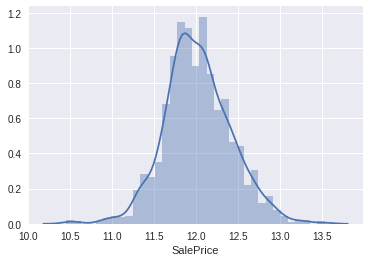

In [29]:
sns.distplot(train['SalePrice'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


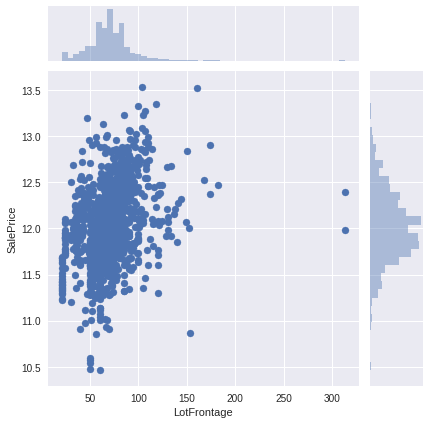

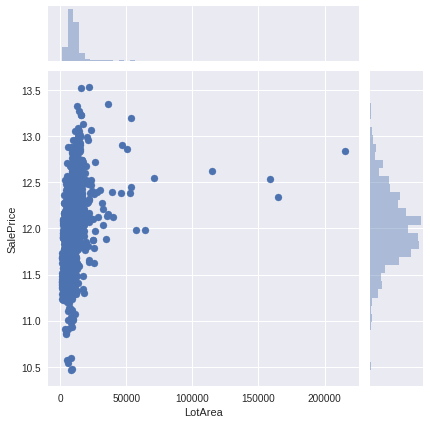

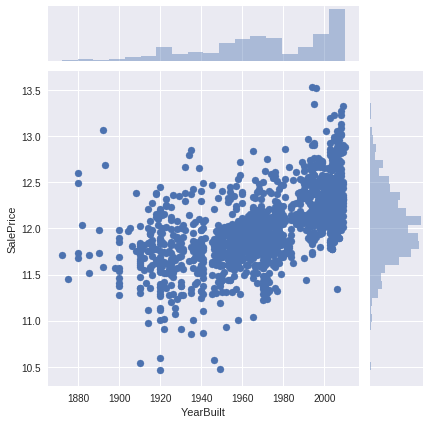

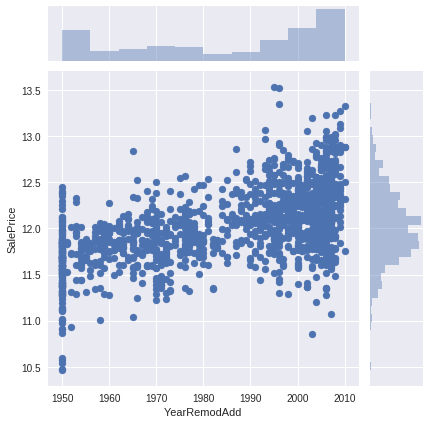

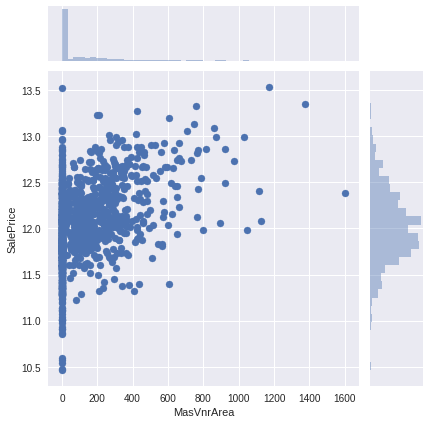

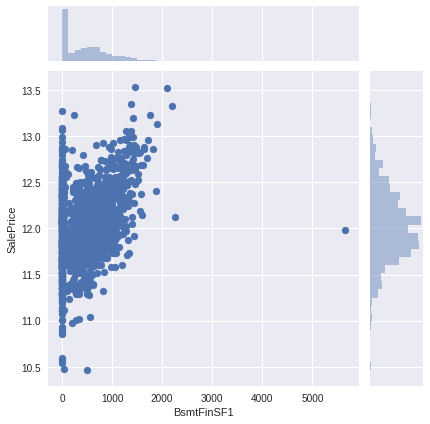

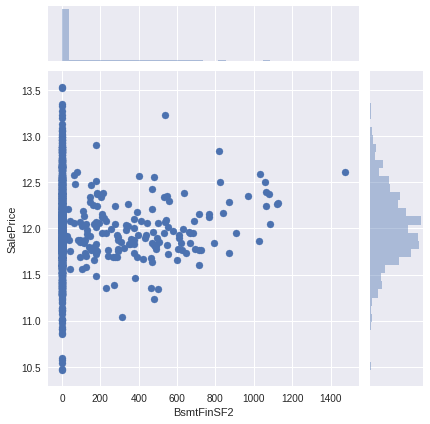

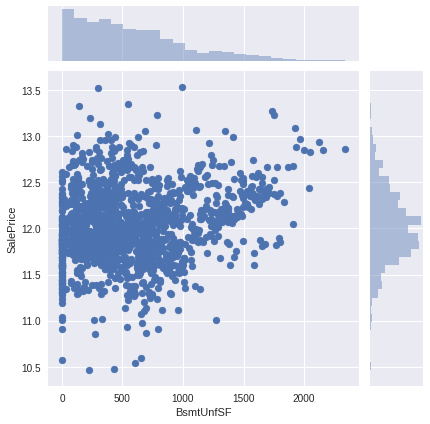

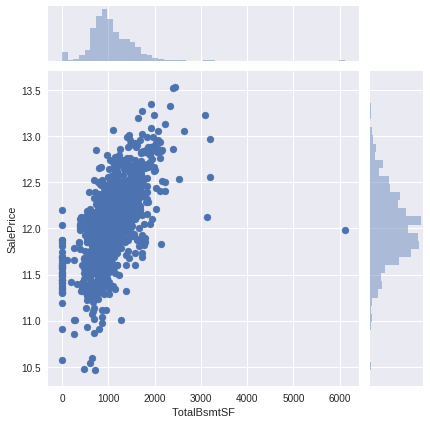

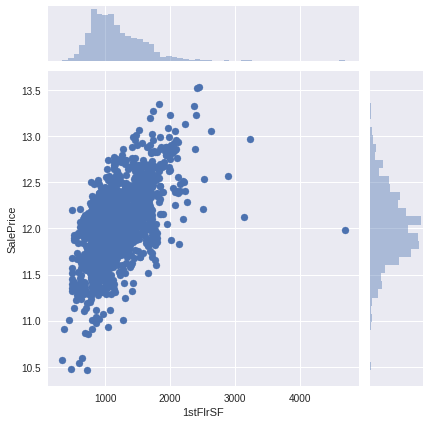

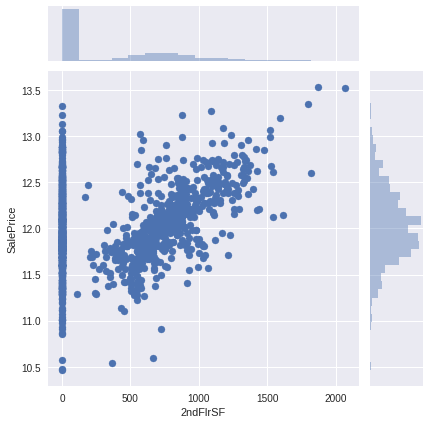

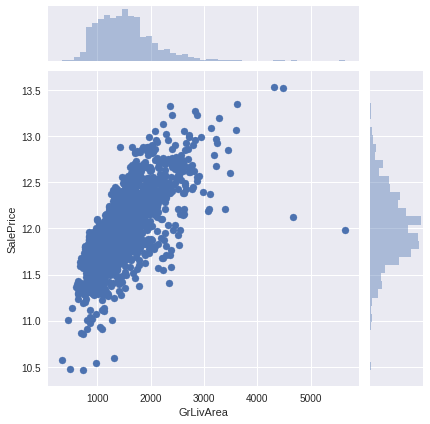

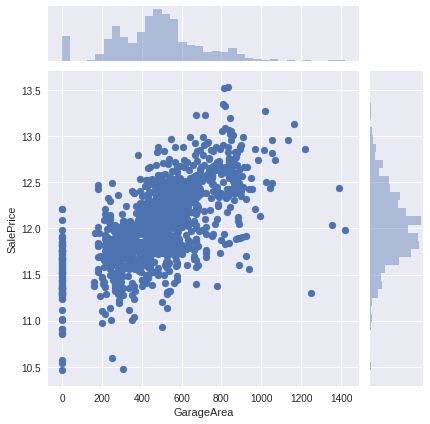

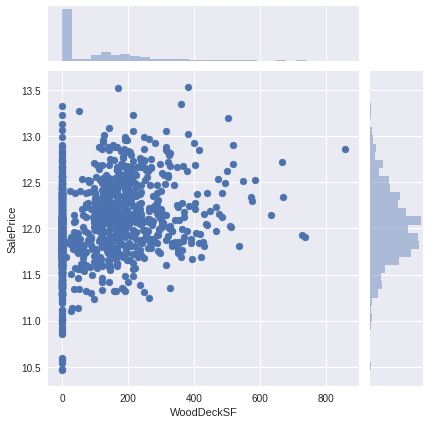

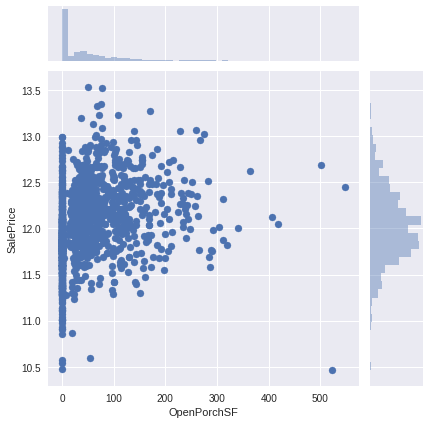

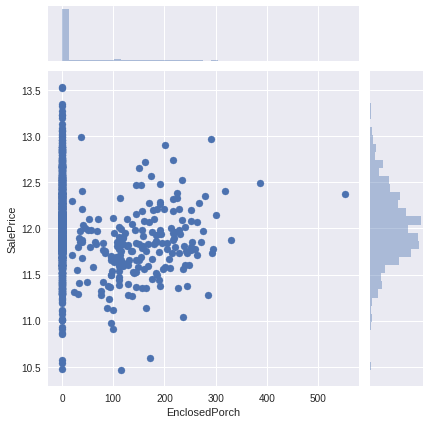

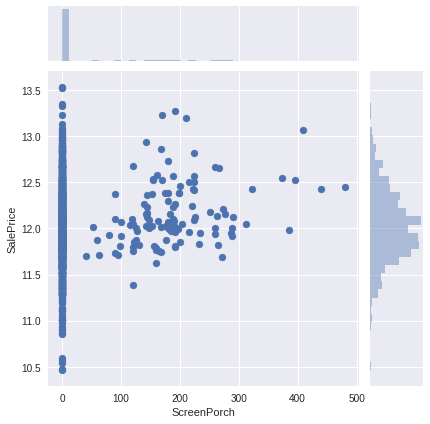

In [30]:
for i in train.columns.values[:-1]:
    if len(train[i].value_counts()) >25 and train[i].dtype!='object':
        sns.jointplot(i, 'SalePrice', data=train)

Очистим дополнительно данные

In [31]:
train.drop(train[(train.LotFrontage >160)|(train.LotArea>70000)|(train['1stFlrSF']>2500)|(train['2ndFlrSF']>1600)|(train.GarageArea>1200)].index,inplace=True)

In [32]:
train.drop(train[(train["GrLivArea"]>4000)|(train.MasVnrArea>1200)|(train.BsmtFinSF1>2000)|(train.BsmtFinSF2>1200)|(train.TotalBsmtSF>2500)].index,inplace=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


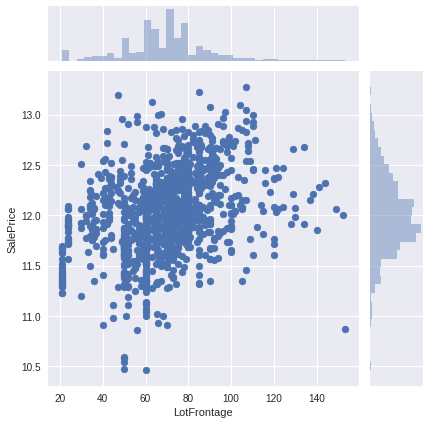

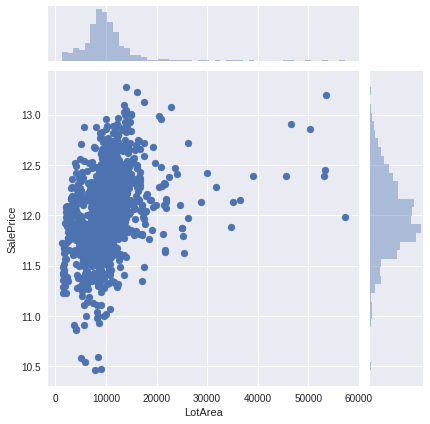

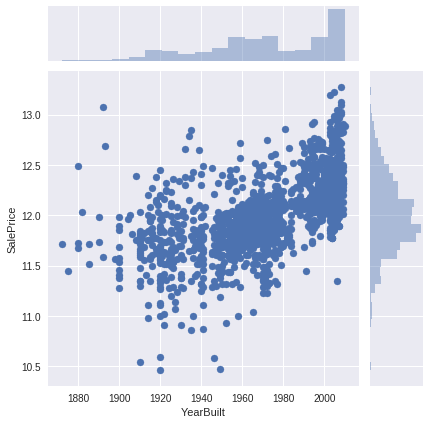

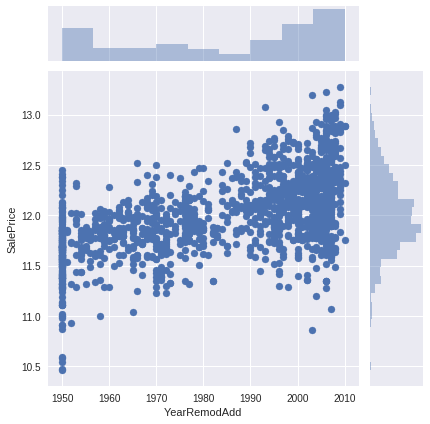

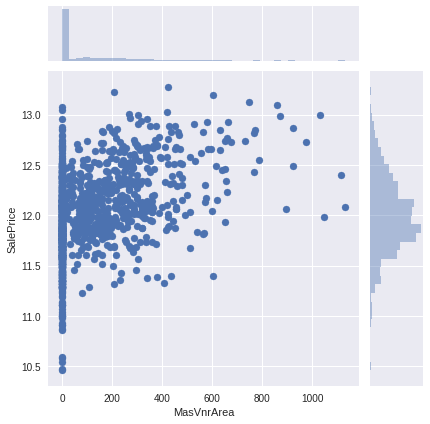

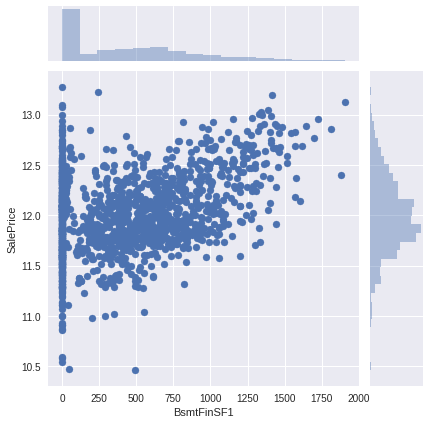

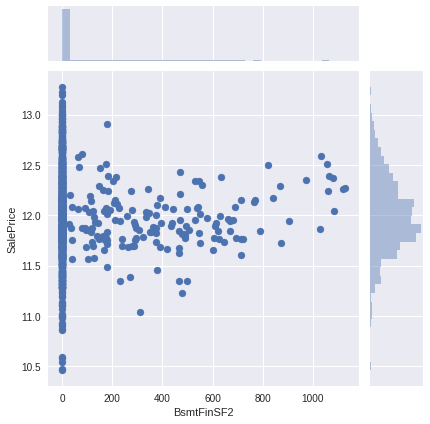

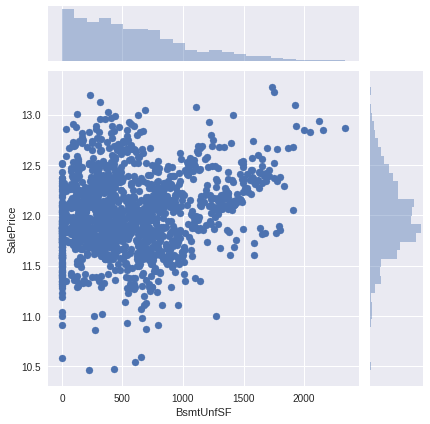

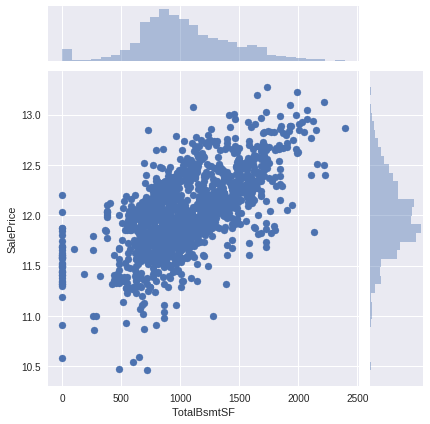

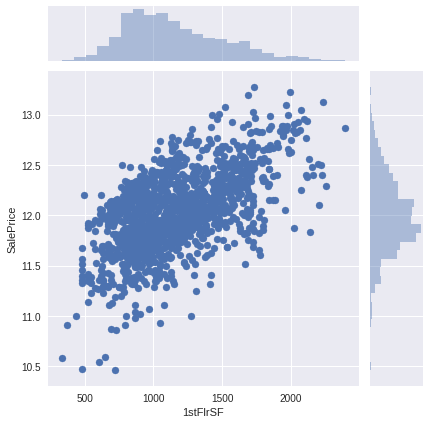

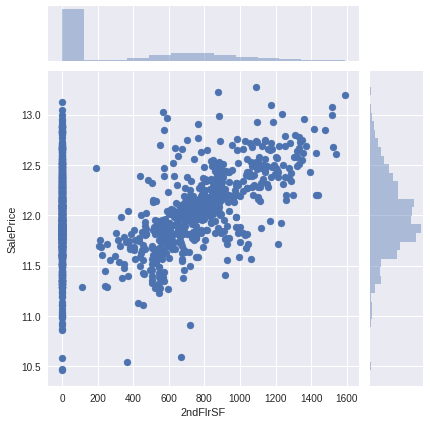

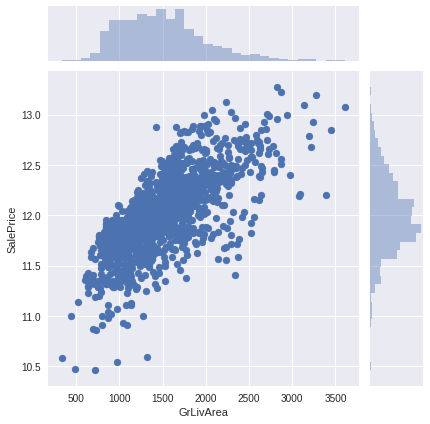

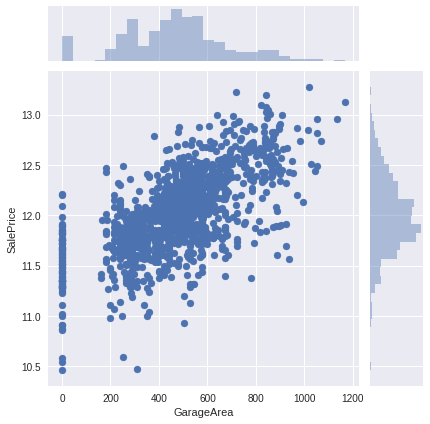

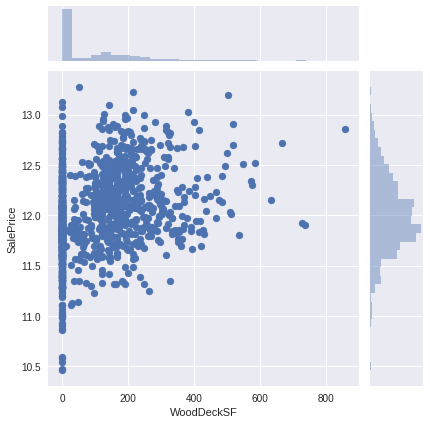

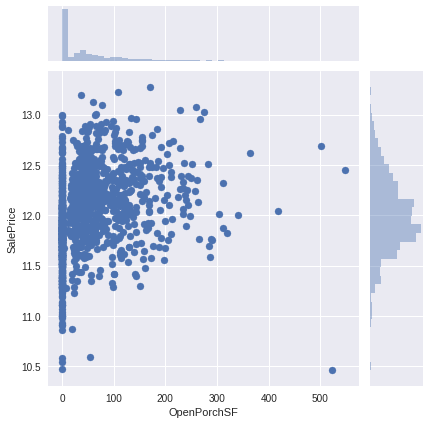

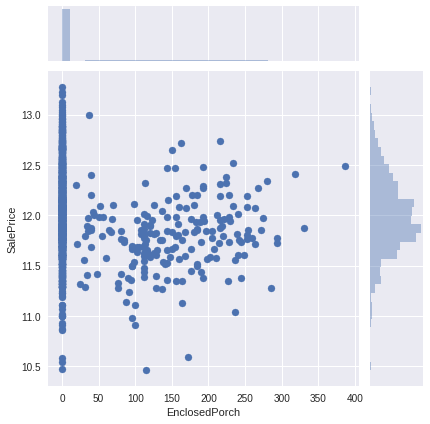

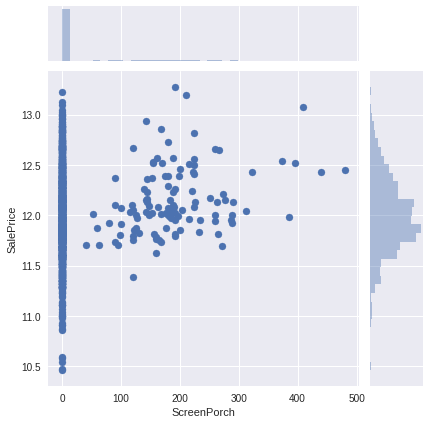

In [33]:
for i in train.columns.values[:-1]:
    if len(train[i].value_counts()) >25 and train[i].dtype!='object':
        sns.jointplot(i, 'SalePrice', data=train)

In [34]:
trainX = train[train.columns[:-1]]
trainY = train.SalePrice

In [35]:
cnt_f = [i for i in train.columns.values[:-1] if train[i].dtype != np.object]

In [36]:
trainX = trainX[cnt_f]

In [37]:
testX = test[cnt_f]

In [38]:
# Import the model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [39]:
#prediction and get results
output = rf.predict(testX)
output = [int(i) for i in np.exp(output)]

In [40]:
# define the data frame for the results
saleprice = pd.DataFrame([float(i) for i in output], columns=['SalePrice'])
results = pd.concat([pd.read_csv("../input/test.csv")['Id'],saleprice['SalePrice']],axis=1)
results.head()

,Id,SalePrice
0,1461,125898.0
1,1462,154076.0
2,1463,178687.0
3,1464,180827.0
4,1465,195813.0


In [41]:
# and write to output
results.to_csv('housepricing_submission.csv', index = False)